In [2]:
import pandas
import os
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
plt.style.use('ggplot')

In [5]:
%matplotlib inline

In [14]:
def convert_to_us(df):
    # Convert ns component of sending time to seconds, then combine with 
    # second component
    df['time_s'] = df['time_s'] - df['time_s'].min()
    df['time_ns'] = df['time_ns'].apply(lambda x: float(x) / 1e9)

    df['time(s)'] = df['time_ns'] + df['time_s']

    # Convert RTT nanosecond component to seconds, add seconds component, 
    # then convert to us
    df['rtt(us)'] = (df['rtt_ns'].apply(lambda x: float(x) / 1e9) + 
                     df['rtt_s']) * 1e6
    
    return df

In [7]:
def remove_outliers(df):
    # Remove the outliers
    return df[np.abs(df["rtt(ms)"]-df["rtt(ms)"].mean())<=(3*df["rtt(ms)"]
                                                           .std())]

In [8]:
def isolate_spikes(df, thresh):
    # isolate spikes in data based on thresh
    spikes = df.loc[df['rtt(us)'] > thresh]
    spikes["diff_time(s)"] = spikes["time(s)"].diff()
    spikes.plot(x="time(s)", y="diff_time(s)")
    
    return spikes

In [9]:
def persec_median(df):
    # Groups data by seconds and returns the median for each second bin
    return df.groupby(['time_s']).median()

In [15]:
# m2m, 128B packets, no sleep
os.chdir("/home/theano/emulab/sequencer/tsch/drat/client")
df = pandas.read_csv('out_largerp', sep=",", names=["time_s", "time_ns", "rtt_s", "rtt_ns"])

df = convert_to_us(df)

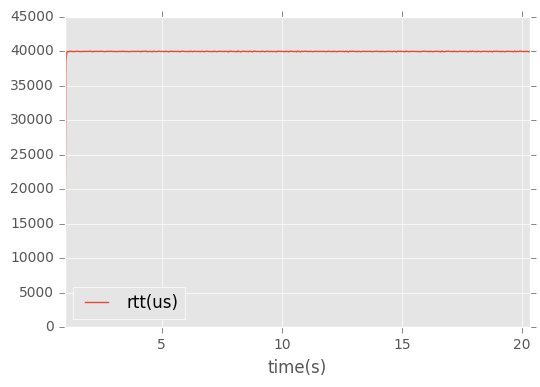

In [18]:
df.plot(x="time(s)", y="rtt(us)")

In [19]:
# m2m, 32B packets, no sleep
os.chdir("/home/theano/emulab/sequencer/tsch/drat/client")
df = pandas.read_csv('out_32bp', sep=",", names=["time_s", "time_ns", "rtt_s", "rtt_ns"])

df = convert_to_us(df)

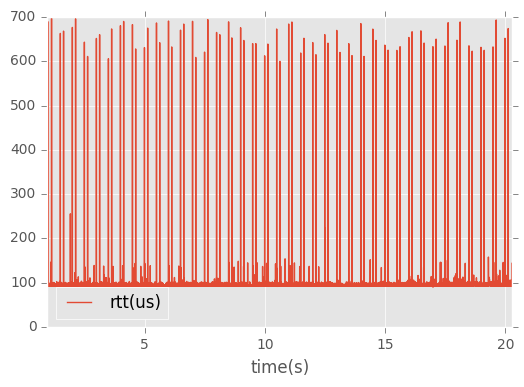

In [20]:
df.plot(x="time(s)", y="rtt(us)")

In [25]:
# m2m, 32B packets, no sleep
os.chdir("/home/theano/emulab/sequencer/tsch/drat/client")
df = pandas.read_csv('out_32bpa', sep=",", names=["time_s", "time_ns", "rtt_s", "rtt_ns"])

df = convert_to_us(df)

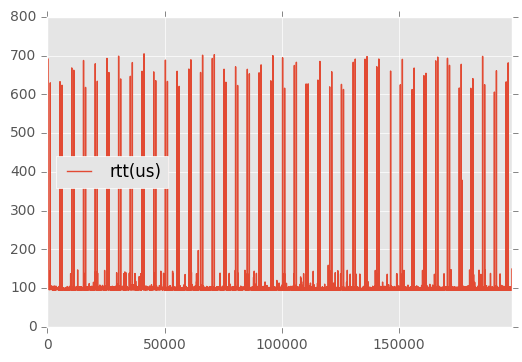

In [28]:
df.plot(x="time(s)", y="rtt(us)")

In [29]:
# m2m, 32B packets, 100us sleep
os.chdir("/home/theano/emulab/sequencer/tsch/drat/client")
df = pandas.read_csv('out_32bpa', sep=",", names=["time_s", "time_ns", "rtt_s", "rtt_ns"])

df = convert_to_us(df)

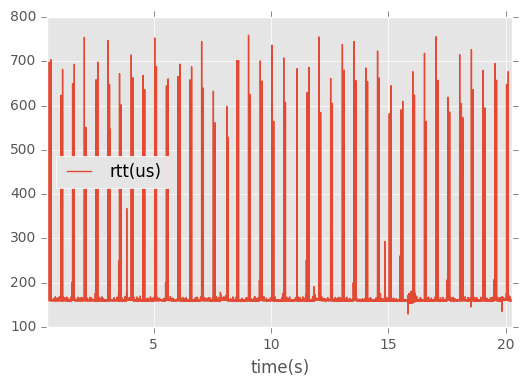

In [30]:
df.plot(x="time(s)", y="rtt(us)")

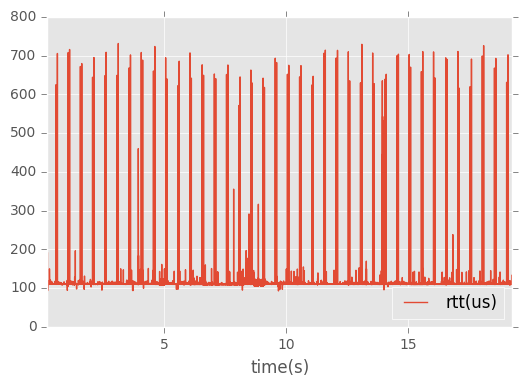

In [31]:
# m2m, 32B packets, 100us sleep
os.chdir("/home/theano/emulab/sequencer/tsch/drat/client")
df = pandas.read_csv('out_32bp_usleep50', sep=",", names=["time_s", "time_ns", "rtt_s", "rtt_ns"])

df = convert_to_us(df)
df.plot(x="time(s)", y="rtt(us)")

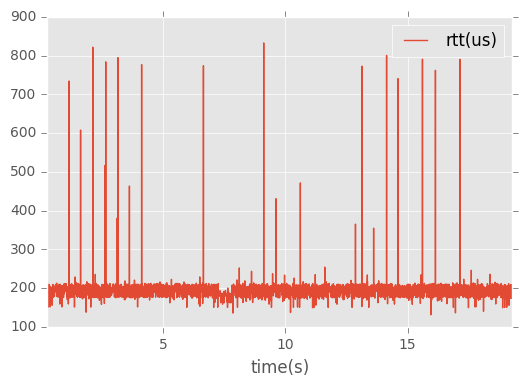

In [32]:
# m2m, 32B packets, 100us sleep
os.chdir("/home/theano/emulab/sequencer/tsch/drat/client")
df = pandas.read_csv('outfile', sep=",", names=["time_s", "time_ns", "rtt_s", "rtt_ns"])

df = convert_to_us(df)
df.plot(x="time(s)", y="rtt(us)")

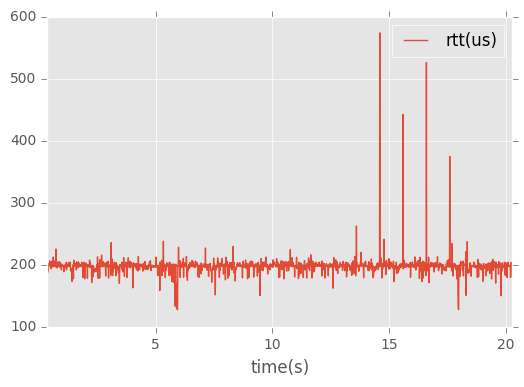

In [34]:
# m2m, 32B packets, 100us sleep
os.chdir("/home/theano/emulab/sequencer/tsch/drat/client")
df = pandas.read_csv('outfile', sep=",", names=["time_s", "time_ns", "rtt_s", "rtt_ns"])

df = convert_to_us(df)
df.plot(x="time(s)", y="rtt(us)")

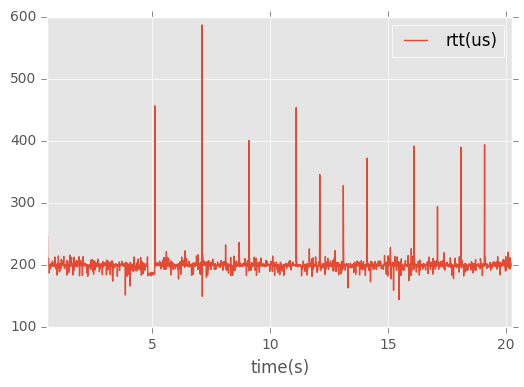

In [37]:
# m2m, 32B packets, 100us sleep
os.chdir("/home/theano/emulab/sequencer/tsch/drat/client")
df = pandas.read_csv('outfile', sep=",", names=["time_s", "time_ns", "rtt_s", "rtt_ns"])

df = convert_to_us(df)
df.plot(x="time(s)", y="rtt(us)")